In [198]:
import glob, re, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [199]:
results = []
for fname in glob.glob('iteration*/all_affinity*.summary'):
    
    name = re.sub('\.summary','', fname)
    name = re.sub('/all_affinity_','-',name)
    for line in open(fname):
        vals = line.split()
        #testset, iteration, rmse, R, S
        if len(vals) == 5:
            vals += [0,0,0]
        for i in xrange(2,8):
            vals[i] = float(vals[i])

        results.append([name,name.split('-')[0]]+vals)

In [200]:
results = pd.DataFrame(results,columns=('name','I','testset','iteration','rmse','R','S','aucpose','aucaff','top'))

In [201]:
results = results[((results.testset == 'all_affinity') | (results.testset == 'all_pose')) & (results.aucpose != 0) & (results.I != 'iteration6') ]
results100 = results[results.iteration == '100k']

In [202]:
results100.sort_values(by='rmse')[:5]

,name,I,testset,iteration,rmse,R,S,aucpose,aucaff,top
953,iteration2-g1_p0_h0,iteration2,all_affinity,100k,1.650597,0.575963,0.579083,0.919870,0.771714,0.561282
2077,iteration5-32-32-32_7_1_1,iteration5,all_affinity,100k,1.662631,0.565374,0.560998,0.887932,0.746926,0.491492
1677,iteration4-3_32_0_7,iteration4,all_affinity,100k,1.662631,0.565374,0.560998,0.887932,0.746926,0.491492
637,iteration2-g2_p0_h0,iteration2,all_affinity,100k,1.668115,0.567108,0.558524,0.915495,0.749532,0.551665
1193,iteration2-g1_p1_h0,iteration2,all_affinity,100k,1.670774,0.568650,0.571575,0.920238,0.805854,0.595314


In [203]:
results100.sort_values(by='aucpose',ascending=False)[:5]

,name,I,testset,iteration,rmse,R,S,aucpose,aucaff,top
443,iteration1-p1_rec0_astrat0_b1,iteration1,all_affinity,100k,1.732900,0.532962,0.550466,0.925966,0.785106,0.528977
442,iteration1-p1_rec0_astrat0_b1,iteration1,all_pose,100k,1.749490,0.524212,0.540142,0.925966,0.785106,0.634279
1081,iteration2-g2_p2_h0,iteration2,all_affinity,100k,1.704713,0.558476,0.557435,0.922099,0.823510,0.610851
1080,iteration2-g2_p2_h0,iteration2,all_pose,100k,1.738621,0.546849,0.546129,0.922099,0.823510,0.618002
2416,iteration3-none_relu_lr0.010,iteration3,all_pose,100k,1.694823,0.543292,0.541804,0.921432,0.776856,0.630826


In [204]:
results100.sort_values(by='top',ascending=False)[:5]

,name,I,testset,iteration,rmse,R,S,aucpose,aucaff,top
2108,iteration3-batch_relu_lr0.010,iteration3,all_pose,100k,1.693488,0.553803,0.551250,0.916430,0.762815,0.656720
2572,iteration3-batch_leaky_lr0.010,iteration3,all_pose,100k,1.702117,0.546954,0.535193,0.914155,0.761463,0.651788
2660,iteration4.6-0.010_1_Adam_0.010,iteration4.6,all_pose,100k,1.749769,0.531438,0.534019,0.917711,0.770594,0.645869
2400,iteration3-batch_tanh_lr0.010,iteration3,all_pose,100k,1.741043,0.512958,0.504249,0.887398,0.761664,0.641184
1948,iteration5-64-32-16_3_1_1,iteration5,all_pose,100k,1.721907,0.528304,0.516657,0.910429,0.742457,0.640937


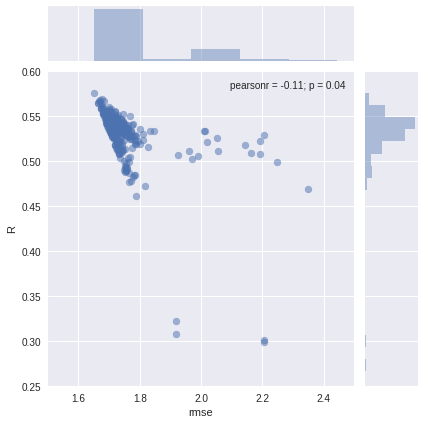

In [205]:
sns.jointplot(x='rmse',y='R',data=results100,alpha=.5,xlim=(1.5,2.5),ylim=(.25,.6))

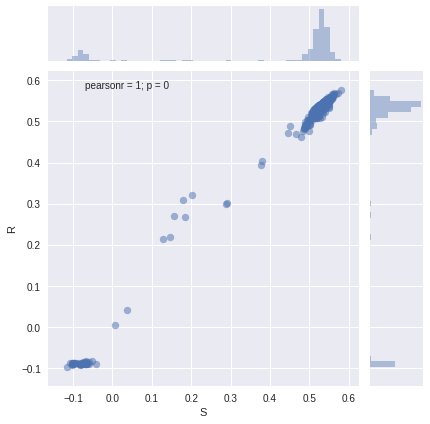

In [207]:
sns.jointplot(x='S',y='R',data=results100,alpha=.5)

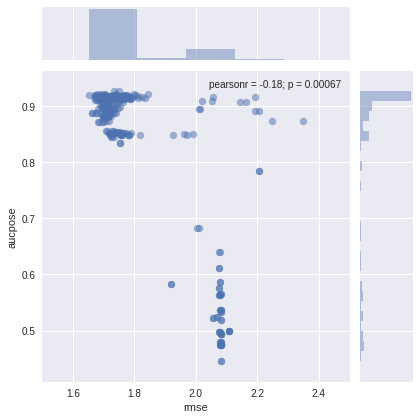

In [150]:
sns.jointplot(x='rmse',y='aucpose',data=results100,alpha=.5,xlim=(1.5,2.5))

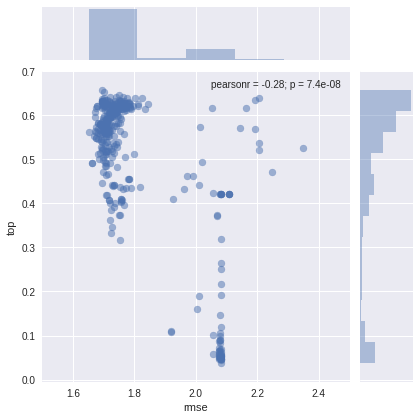

In [151]:
sns.jointplot(x='rmse',y='top',data=results100,alpha=.5,xlim=(1.5,2.5))

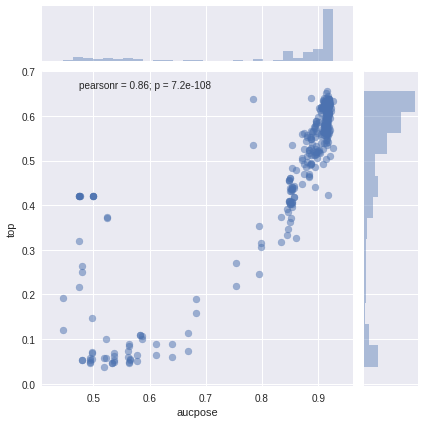

In [209]:
sns.jointplot(x='aucpose',y='top',data=results100,alpha=.5)

In [152]:
# thank you stack overflow

def is_pareto_efficient_dumb(costs):
    """
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs>=c, axis=1))
    return is_efficient

In [153]:
costs = np.array(results100[['rmse','aucpose','top','R']])
costs[:,1:] *= -1
pareto = is_pareto_efficient_dumb(costs)

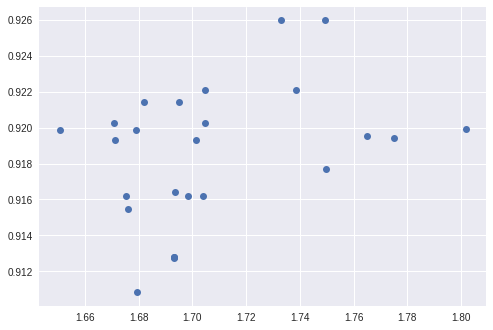

In [154]:
p = results100[pareto]
plt.plot(p.rmse,p.aucpose,'o')

In [155]:
r = results100[results100.testset == 'all_pose']
costs = np.array(r[['top','S']])*-1
pareto = is_pareto_efficient_dumb(costs)
p = r[pareto]

In [156]:
ra = results100[results100.testset == 'all_affinity']
costs = np.array(ra[['top','S']])*-1
paretoa = is_pareto_efficient_dumb(costs)
pa = ra[paretoa]

(0.5, 0.6138508802164)

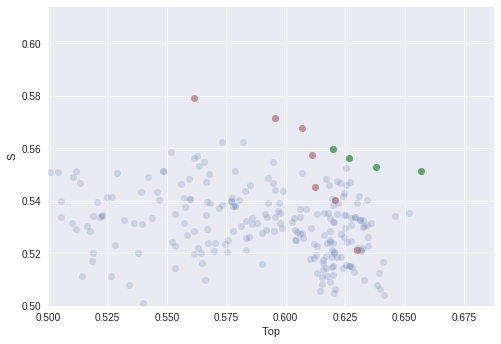

In [157]:
plt.plot(results100.top,results100.S,'o',alpha=.2)

plt.plot(p.top,p.S,'o')
plt.plot(pa.top,pa.S,'o',alpha=.5)
plt.xlabel('Top')
plt.ylabel('S')
plt.xlim(.5)
plt.ylim(.5)

(0.5, 0.59300561839379995)

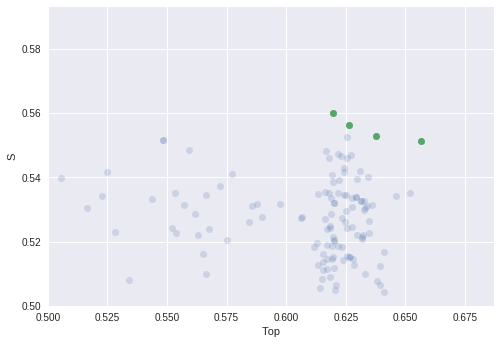

In [161]:
plt.plot(r.top,r.S,'o',alpha=.2)

plt.plot(p.top,p.S,'o')
#plt.plot(pa.top,pa.S,'o',alpha=.5)
plt.xlabel('Top')
plt.ylabel('S')
plt.xlim(.5)
plt.ylim(.5)

In [144]:
p.sort_values('top')

,name,I,testset,iteration,rmse,R,S,aucpose,aucaff,top
952,iteration2-g1_p0_h0,iteration2,all_pose,100k,1.678961,0.559362,0.559834,0.919870,0.771714,0.619729
1192,iteration2-g1_p1_h0,iteration2,all_pose,100k,1.704754,0.554418,0.556157,0.920238,0.805854,0.626387
540,iteration2-g2_p1_h0,iteration2,all_pose,100k,1.701453,0.552951,0.552811,0.919297,0.801777,0.637731
2108,iteration3-batch_relu_lr0.010,iteration3,all_pose,100k,1.693488,0.553803,0.551250,0.916430,0.762815,0.656720
276,iteration6-0.250_conv4_pool1_grouped0_func1_swap0,iteration6,all_pose,100k,1.707395,0.531778,0.529454,0.910258,0.748140,0.669544


In [158]:
pa.sort_values('top')

,name,I,testset,iteration,rmse,R,S,aucpose,aucaff,top
953,iteration2-g1_p0_h0,iteration2,all_affinity,100k,1.650597,0.575963,0.579083,0.919870,0.771714,0.561282
1193,iteration2-g1_p1_h0,iteration2,all_affinity,100k,1.670774,0.568650,0.571575,0.920238,0.805854,0.595314
541,iteration2-g2_p1_h0,iteration2,all_affinity,100k,1.671064,0.566444,0.567625,0.919297,0.801777,0.606905
1081,iteration2-g2_p2_h0,iteration2,all_affinity,100k,1.704713,0.558476,0.557435,0.922099,0.823510,0.610851
1049,iteration2-g1_p4_h6,iteration2,all_affinity,100k,1.728620,0.551862,0.545324,0.917875,0.822993,0.612330
1321,iteration2-g2_p4_h0,iteration2,all_affinity,100k,1.773668,0.540626,0.540151,0.917587,0.832073,0.620715
857,iteration2-g1_p4_h0,iteration2,all_affinity,100k,1.781914,0.528489,0.521414,0.916916,0.830906,0.630086


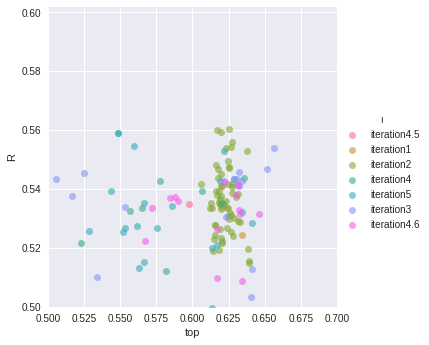

In [165]:
plt.figure(figsize=(12,12))
sns.lmplot(x='top',y='R',data=results100[results100.testset == 'all_pose'],fit_reg=False,hue='I',scatter_kws={'alpha':0.6})
plt.xlim(.5)
plt.ylim(.5)
plt.savefig('iterations.pdf',bbox_inches='tight')

In [170]:
sdata = pd.read_csv('search_data.csv') # created with extractres.py

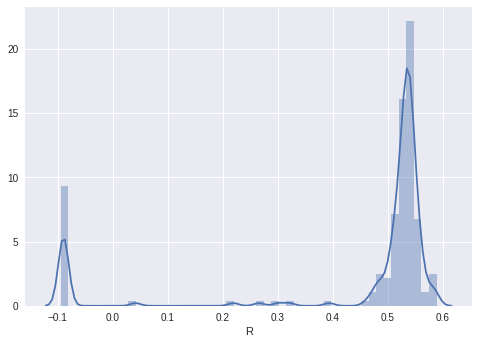

In [173]:
sns.distplot(sdata.R)

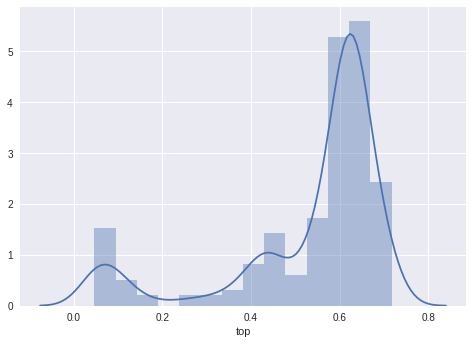

In [174]:
sns.distplot(sdata.top)

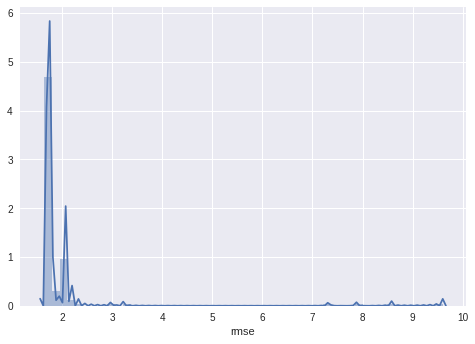

In [177]:
sns.distplot(sdata.rmse)

In [178]:
sdata.top.max()

0.71763255240400003

In [186]:
sdata.loc[:,['top','auc','R','rmse']]

,top,auc,R,rmse
0,0.613317,0.914527,0.533481,1.834271
1,0.624168,0.921237,0.533601,1.845174
2,0.634279,0.925966,0.524212,1.749490
3,0.620222,0.915519,0.541174,1.724415
4,0.620222,0.915429,0.533995,1.773011
5,0.615536,0.915351,0.524260,1.769684
6,0.625401,0.914728,0.547576,1.714522
7,0.637731,0.919297,0.552951,1.701453
8,0.617263,0.915837,0.538066,1.742812
9,0.614303,0.912644,0.519095,1.789310


(1, 2)

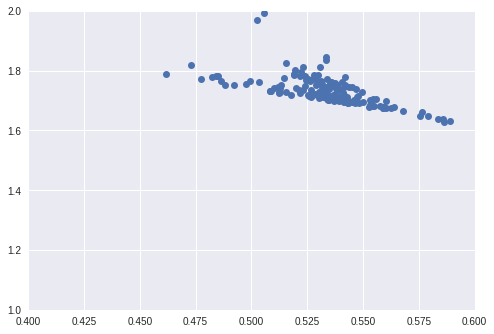

In [189]:
plt.plot(sdata.R,sdata.rmse,'o')
plt.xlim(.4,.6)
plt.ylim(1,2)